<a href="https://colab.research.google.com/github/adigenova/uohdb/blob/main/code/Chinook_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with the Chinook database

## downloading the database from github

In [1]:
#download the Chinook database
!pip install SQLAlchemy==1.4.46
!git clone https://github.com/lerocha/chinook-database.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10
Cloning into 'chinook-database'...
remote: Enumerating objects: 1960, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 1960 (delta 33), reused 50 (delta 21), pack-reused 1885
Receiving objects: 100% (1960/1960), 19.57 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (1277/1277), done.


In [2]:
# load the SQL magic extension
# https://github.com/catherinedevlin/ipython-sql
# this extension allows us to connect to DBs and issue SQL command
%load_ext sql
# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
# use %%sql to write SQL commands in a cell
%sql sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

## getting information from the Chinook database

We get information about the database engine



In [3]:
%%sql
SELECT sqlite_version();

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
Done.


sqlite_version()
3.31.1


We are using [SQLite](https://www.sqlite.org/index.html) 3.22. It's a fast Relational Database engine writing in C. SQLite DB is self-contained: one database is just a file.  SQLite is the most used DB engine in the world. It's built into millions of mobile phones.

### Display tables of the Chinook database


In [ ]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

getting information about a particular table


In [ ]:
%%sql 
PRAGMA table_info([Artist]);

In [ ]:
%%sql
PRAGMA table_info([Employee]);

In [ ]:
%%sql 
SELECT sql 
FROM sqlite_master 
WHERE tbl_name = 'Employee';

getting the SQL code that generate a table


## Create automatic documentation with [schemaspy](https://schemaspy.org/)

<img src="https://schemaspy.org/sample/diagrams/summary/relationships.real.large.png" alt="ER Diagram" width="836" height="605" />


In the above ER diagram, the tiny vertical key icon indicates a column is a primary key. A primary key is a column (or set of columns) whose values uniquely identify every row in a table. For example, `Employeeud` is the primary key in the `Employee` table.

The relationship icon indicates a foreign key constraint and a one-to-many relationship. 




# Visualizations with matlibPlot



In [ ]:
#we select the genderID from Track and use the Group by to order
%%sql 
select GenreId,COUNT(GenreId) from Track group by GenreId order by COUNT(GenreId);

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
Done.


([<matplotlib.patches.Wedge at 0x7f6ec8ae0400>,
 [Text(1.099999557633573, 0.0009865120090909278, '25'),
  Text(1.0999132973185322, 0.01381080670614299, '5'),
  Text(1.0993272292408907, 0.03846612860096677, '18'),
  Text(1.0980148145051614, 0.06605654492324219, '11'),
  Text(1.0956672140776675, 0.09753643419401385, '22'),
  Text(1.0913410023248564, 0.13774910759993292, '12'),
  Text(1.08406917435208, 0.18653156628195608, '20'),
  Text(1.0737681990793713, 0.23879249285905985, '13'),
  Text(1.0604266054107625, 0.29239598926286087, '16'),
  Text(1.0437899056790356, 0.3471348913643662, '15'),
  Text(1.0217925288197627, 0.40735737141742556, '17'),
  Text(0.992102908478928, 0.47511242773437523, '23'),
  Text(0.9540224255386923, 0.5475775849770244, '10'),
  Text(0.9062080753916403, 0.6235278053904089, '9'),
  Text(0.842930648557247, 0.7067304448818228, '8'),
  Text(0.7628537573503251, 0.7924986718578723, '14'),
  Text(0.669409266901983, 0.8728638114767675, '21'),
  Text(0.5565369112673118, 0.9

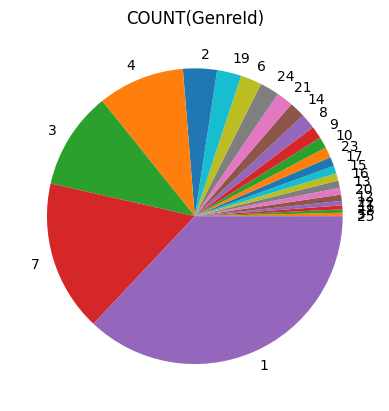

In [9]:

result = %sql select GenreId,COUNT(GenreId) from Track group by GenreId order by COUNT(GenreId);
%matplotlib inline
result.pie()